<center>
<img src="logo.png" height="900"> 
</center>


#  Логи магазина

В файле `walmart.csv` нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.

__а)__ Подгрузите все необходимые для работы библиотеки.

In [1]:
!pip install plotly_express

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [2]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
# стиль графиков
# plt.style.use('ggplot')    
plt.style.use('fivethirtyeight')
%matplotlib inline
# your code here


__б)__ Загрузите файл с данными. Отобразите первые и последние 5 наблюдений. Выведите на экран тип колонок. Приведите колонку `Date` к формату даты. В переменную `ans1` запишите число строк, которое есть в таблице. 

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 510782
df=pd.read_csv('walmart.csv')
#df.head()
#df.tail()
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
ans1 = df.shape[0]
ans1

# your code here


418239

In [4]:
# проверка, что задание решено корректно
assert ans1 > 418000

# Подобные тесты скрыты от вас 

__в)__ Разберитесь с пропущенными переменными: 

- Выведите на экран, сколько пропущенных значений в процентах есть в каждой переменной.
- Визуализируйте пропуски с помощью функции `sns.heatmap`. Не надо рисовать картинку сразу для всего датасета. На визуализации нам хочется посмотреть на то, как пропуски в разных переменных соотносятся друг с другом. Отберите случайные $10\%$ наблюдений из исходной таблички методом `.sample( )` и визуализируйте их. 
- Запишите в переменную `ans2` число переменных, которые имеют более $60\%$ пропусков.
- Удалите эти переменные из набора данных.

5

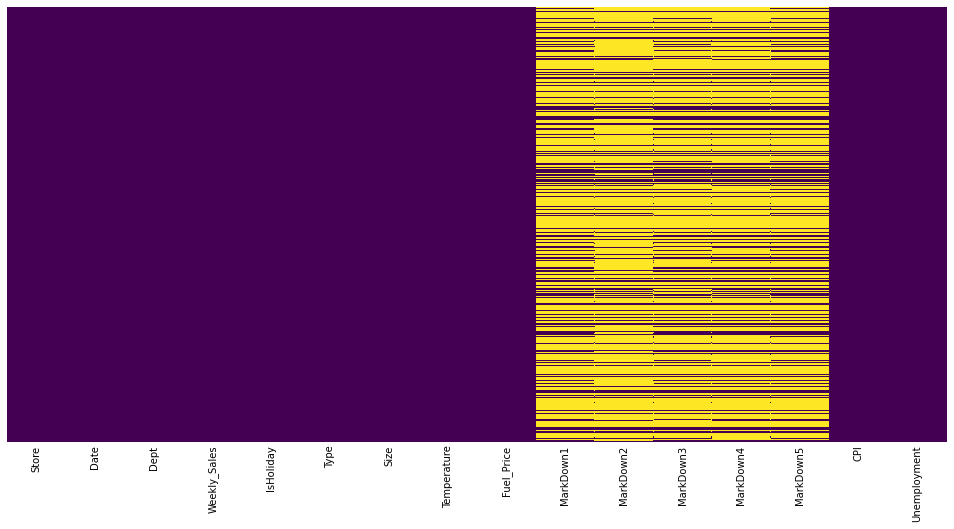

In [5]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
# Формат ответа: целое число, пример: 6
n=int(0.1*df.shape[0])
# your code here
fig, ax = plt.subplots(figsize=(15,8))
Heat=sns.heatmap(df.sample(n).isnull(),
                 yticklabels=False, 
                 cbar=False, 
                 cmap='viridis')
h=100*df.isnull().mean()
ans2=0
for i in df.columns:
    if h[i]>60:
        df=df.drop(i,axis=1)
        ans2+=1
ans2








In [6]:
# проверка, что задание решено корректно
assert ans2 > 4
assert ans2 < 10

# Подобные тесты скрыты от вас 

__г)__ Сколько уникальных магазинов есть в данных? Запишите их число в переменную `ans3`. Сколько уникальных отделов есть в данных? Запишите их число в переменную `ans4`. За какой диапазон у нас присутствуют данные? Запишите этот диапазон, выраженный в числе дней, в переменную `ans5`. 

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
from datetime import datetime
# Формат ответа: целое число, пример: 555
ans3 = len(df.Store.value_counts().index)
ans4 = len(df.Dept.value_counts().index)
ans5 = (df.Date.max()-df.Date.min())/np.timedelta64(1, 'D')

# your code here


In [8]:
# проверка, что задание решено корректно
assert ans3 < 50
assert ans4 > 80
assert ans5 > 900

# Подобные тесты скрыты от вас 

__д)__ Посмотрим на динамику продаж в магазинах в целом. Для этого построим график, где по оси $x$ будет отложена дата, а по оси $y$ продажи по всей сети Walmart. Обязательно подпишите у графика оси. В какой день наблюдаются максимальные продажи? Запишите дату этого дня в переменную `ans6` в формате `год-месяц-день`.

Насколько хорошо идут дела у магазинов? Есть ли в динамике продаж какие-то интересные особенности? Как думаете, с чем они связаны? 

In [75]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: строка, пример: '2010-12-04'
# Вокруг ответа не должно быть никаких надписей array(['pip fruit']) или Index('pip fruit')
# Это должна быть именно строка, а не строка в массиве
sum1=[]
from tqdm.notebook import tqdm
s=df.Date.value_counts().index
for date in s:
    sum1.append(df[df.Date==date]['Weekly_Sales'].values.sum())
max=0
date_1=0
for i in range(142):
    if sum1[i]>max:
        max=sum1[i]
        date1=df.Date.value_counts().index[i]
ans6=str(date1)[:10]  
def SUMM(date):
    return df[df.Date==date]['Weekly_Sales'].values.sum()
#df['SUM']=df['Date'].apply(SUMM)
#df.plot(x='Date',y='SUM',figsize=(12,7))
#plt.ylabel("Продажи")
#plt.xlabel("Date")
#plt.title("Динамика Продаж")
# your code here



In [76]:
# проверка, что задание решено корректно
assert ans6.split('-')[-1] == '24'

# Подобные тесты скрыты от вас 

__е)__ Найдите и нарисуйте матрицу корреляции для числовых показателей. Какие два показателя коррелируют сильнее всего? Запишите модуль получившегося значения в переменную `ans7` (корреляция мб отрицательной). 

При строительстве матрицы не надо брать в расчёт номер магазина, номер отдела и размер магазина, так как их взаимосвязь с другими показателями не имеет никакого смысла.

Обратите отдельное внимание на знак корреляции между безработицей (Unemployment) и индексом потребительских цен (CPI). Про него в конце тетрадки вас ждёт отдельная история.

0.2997230218737895

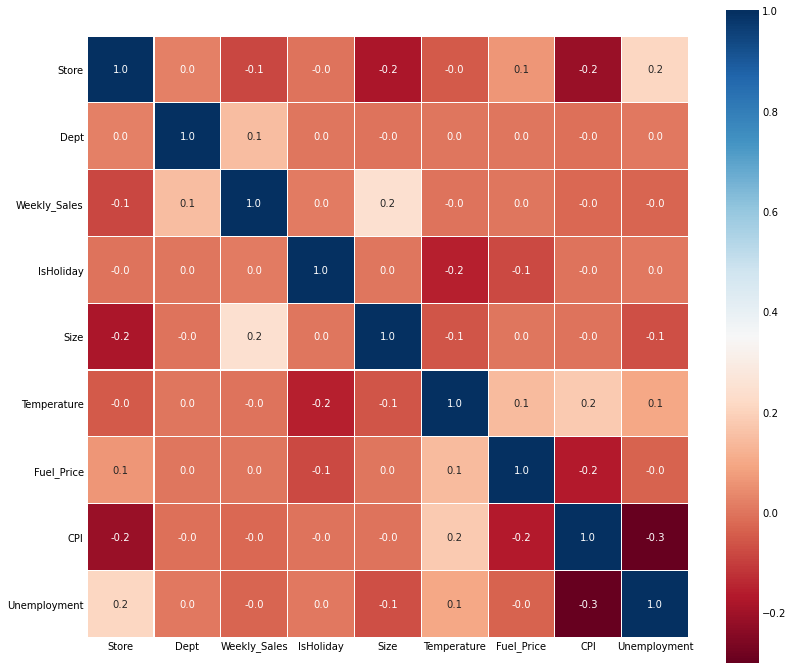

In [97]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа действительное число, пример: 0.22222
# Не забудьте взять модуль от матрицы корреляций! 
plt.subplots(figsize=(12, 12))
ans7 = -1*df.corr()['Unemployment']['CPI']
sns.heatmap(df.corr( ), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");
ans7


# your code here


Постройте между этими же переменными облака рассеивания методом `sns.pairplot`. Не надо строить эту визуализацию сразу же для всех точек, которые есть в данных. Отберите случайные $10\%$ наблюдений для картинки с помощью метода `.sample( )`.

- Как думате, между какими переменными в данных присутствует нелинейная взаимосвязь? 
- Как думаете, какое распределение у цен? Как бы вы его нормализовали, если бы вам это понадобилось? 

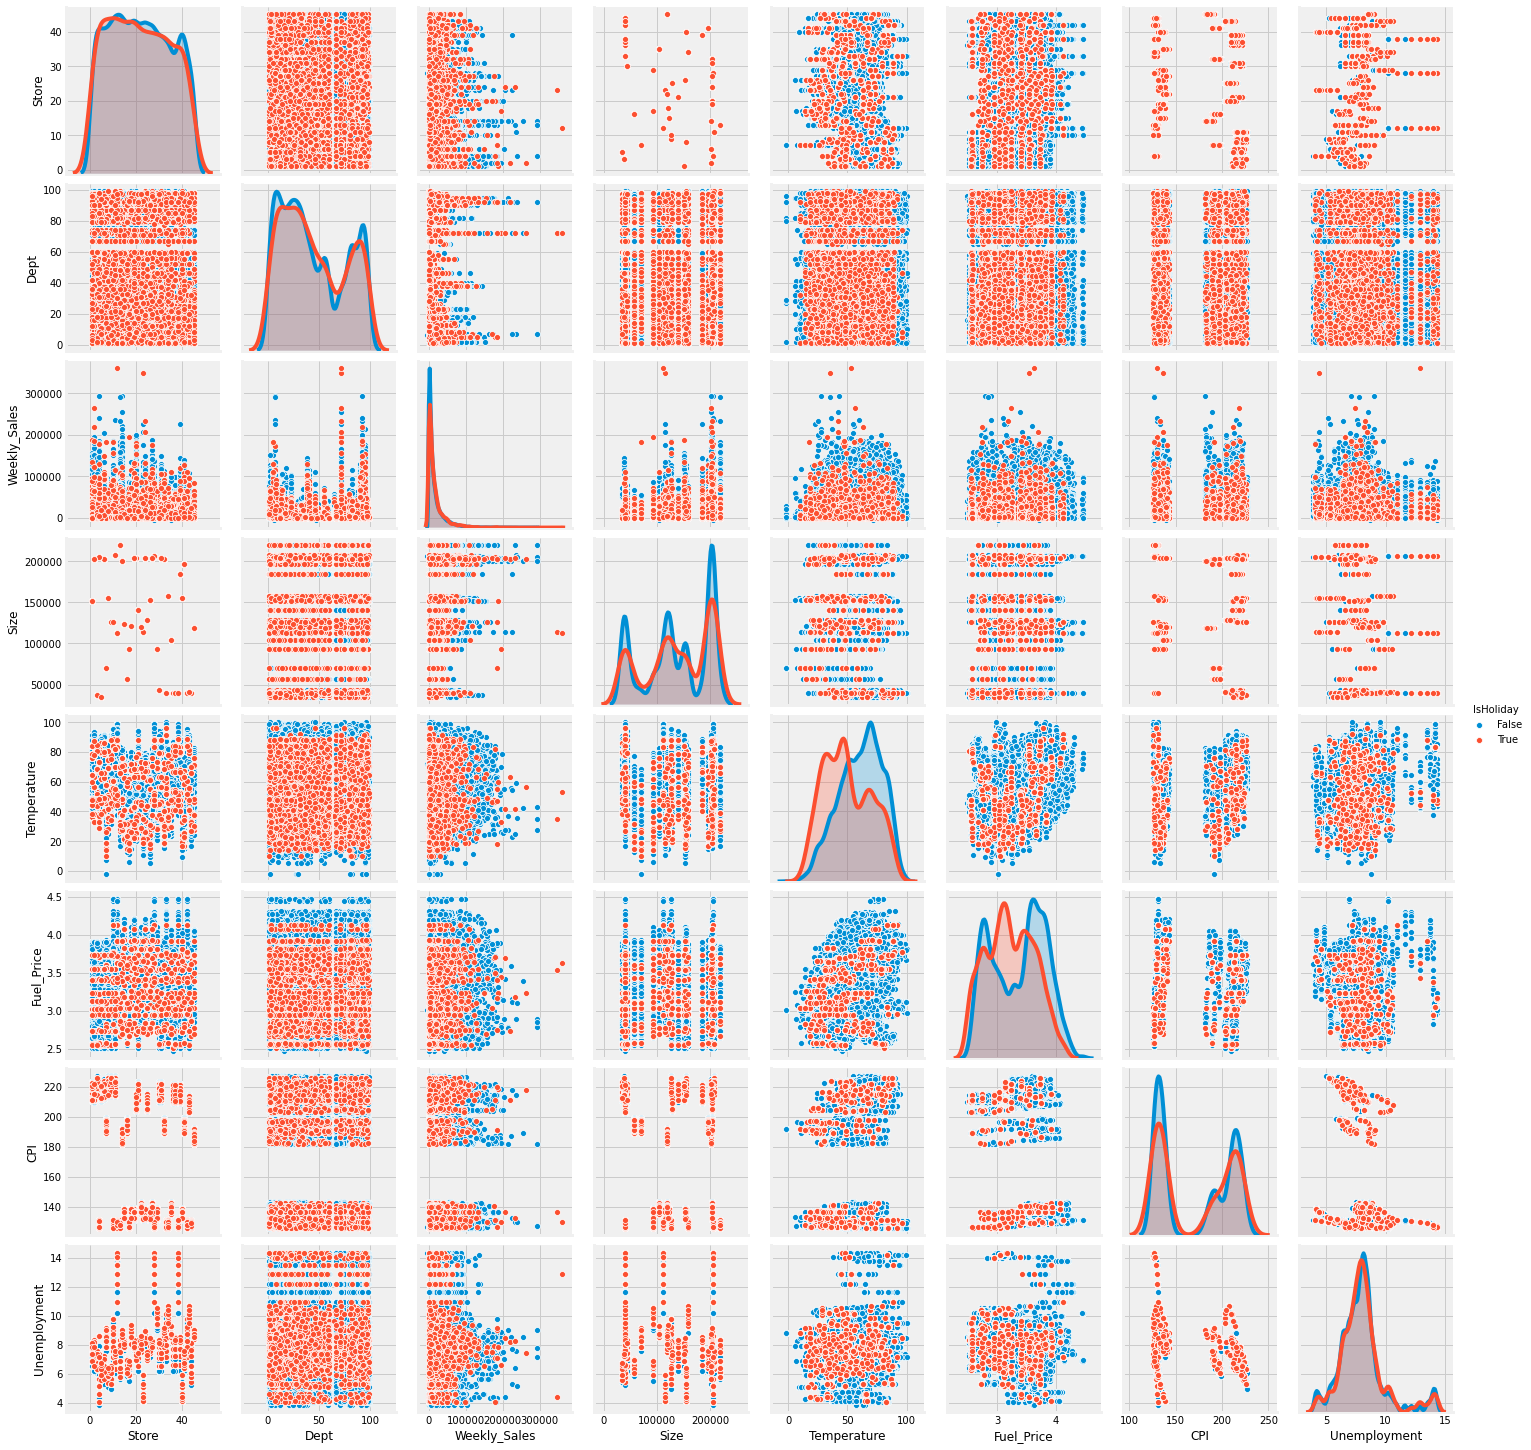

In [94]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
n=int(0.1*df.shape[0])
sns.pairplot(df.sample(n),hue='IsHoliday',kind='scatter');
# your code here


In [89]:
# проверка, что задание решено корректно
assert ans7 > 0.2
assert ans7 < 0.35

# Подобные тесты скрыты от вас 

__ё)__  Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике. Правда ли, что пик продаж у них происходит примерно в одно время? Как думаете, с чем связан этот пик? 

In [105]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you


# your code here


__ж)__ Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you


# your code here


# Бонусная история про анализ данных и ошибки, которые мы при нём совершаем

Помните, когда мы смотрели на корреляционную матрицу, мы увидели, что между безработицей и инфляцией есть отрицательная взаимосвязь: чем больше безработица, тем ниже инфляция. В экономике эта взаимосвязь называется кривой Филиппса. И за ней кроется очень интересная история из целой плеяды ошибок. Давайте попробуем научиться на чужих ошибках чему-нибудь новому. 

В $1958$ году была опубликована статья экономиста Филиппса, в которой он обнаружил достаточно чёткую отрицательную связь между инфляцией и безработицей в Англии за прошедшие $70$ лет. Проверка этой работы на американских данных подтвердила наличие взаимосвязи. Так родилась знаменитая кривая Филиппса. Её стали интерпретировать как некую возможность выбора между высокой инфляцией и высокой безработицей. Нужно сократить безработицу? Давайте напечатаем денег и разгоним инфляцию!

Любому политику безработица кажется более значимой социальной проблемой, нежели инфляция, и он хочет её победить любыми доступными средствами. Самым популярным средством по борьбе с безработицей является агрессивная монетарная политика, которая состоит в расширении денежной массы. Грубо говоря, просто печатают ещё денег. Именно это и было сделано президентом США Ричардом Никсоном в начале $1970$-х гг. в ходе погони за низкой безработицей и высокой инфляцией.

К сожалению, план Никсона удался только наполовину, он добился высокой инфляции, но сбить безработицу не смог. В краткосрочном периоде она действительно упала, но через некоторое время вернулась назад. Кривая Филиппса в этот период времени исчезла из данных. Никакой взаимосвязи между безработицей и инфляцией больше не прослеживалось.

В течение $70$-х все Западные страны поэкспериментировали с кривой Филиппса. В конечном итоге, $1980$-е годы были потрачены на обуздание разогнанной инфляции. Победа над инфляцией обошлась довольно дорого. Например, Пол Волкер, возглавлявший в этот период времени ФРС США, взвинтил процентную ставку до $19\%$. Высокие ставки отправили экономику в рецессию. Такая жёсткая принципиальная политика ФРС позволила сбить инфляционные ожидания.

__Какова мораль этой истории?__ Политики увидели в данных закономерность, но начав бороться с безработицей, печатая деньги, немного перепутали причину и следствие. На самом деле никакой чёткой отрицательной зависимости между инфляцией и безработицей в природе не существует. Её наличие в данных является следствием сложного взаимодействия между экономическими агентами. Политики пытавшись воздействовать на следствие, а не на причину, из-за этого у них не получилось достичь своих целей.

Не путайте причину и следствие, когда смотрите в данные и помните, что работа с ними малость сложнее, чем кажется на первый взгляд. __Корреляция не обозначает причинности.__ 